In [41]:
import numpy as np
import scipy.signal as signal
from scipy.stats import skew as skewness
from scipy.stats import kurtosis as kurtosis_value
import pandas as pd

import librosa
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
import matplotlib.pyplot as plt

In [4]:
dataset_audio = pd.read_csv("dataset heartbeat.csv") 
audio_paths = []
labels = []


# Pra-pemrosesan audio dan ekstraksi fitur Hjorth
segment_length = 1000  # Panjang segmen suara (misalnya 1 detik)
overlap = 0.5  # Jumlah tumpang tindih antara segmen-suara
features = []


for i in range(len(dataset_audio)):
    file_name = "dataset/training-a/wav/" + dataset_audio['Data'][i] + ".wav"
    audio_paths.append(file_name)

    print(file_name)

    # labels.append(dataset_audio['Column2'][i])
    labels.append(dataset_audio['Label'][i])



# Pra-pemrosesan audio dan pemotongan segmen
def preprocess_audio(audio_path, segment_length, overlap):
    audio, sr = librosa.load(audio_path, sr=None)
    audio_normalized = audio / np.max(np.abs(audio))  # Normalisasi amplitudo audio

    segments = []
    step = int(segment_length * (1 - overlap))
    for i in range(0, len(audio_normalized) - segment_length, step):
        segment = audio_normalized[i:i + segment_length]
        segments.append(segment)
    return segments


# Fungsi untuk menghitung fitur-fitur Hjorth
def hjorth_features(signal):
    diff1 = np.diff(signal)
    diff2 = np.diff(signal, 2)
    var_signal = np.var(signal)
    var_diff1 = np.var(diff1)
    var_diff2 = np.var(diff2)
    mobility = np.sqrt(var_diff1 / var_signal)
    complexity = np.sqrt(var_diff2 / var_diff1) / mobility if var_diff1 != 0 else 0
    return np.mean(signal), np.std(signal), mobility, complexity, np.mean(diff1), np.std(diff1), np.mean(diff2), np.std(diff2)

for audio_path in audio_paths:
    audio, sr = librosa.load(audio_path, sr=None)
    audio_normalized = audio / np.max(np.abs(audio))  # Normalisasi amplitudo audio coarse grain
    mean, std, mobility, complexity, mean_diff1, std_diff1, mean_diff2, std_diff2 = hjorth_features(audio_normalized)
    features.append([mean, std, mobility, complexity, mean_diff1, std_diff1, mean_diff2, std_diff2])




dataset/training-a/wav/a0001.wav
dataset/training-a/wav/a0002.wav
dataset/training-a/wav/a0003.wav
dataset/training-a/wav/a0004.wav
dataset/training-a/wav/a0005.wav
dataset/training-a/wav/a0006.wav
dataset/training-a/wav/a0007.wav
dataset/training-a/wav/a0008.wav
dataset/training-a/wav/a0009.wav
dataset/training-a/wav/a0010.wav
dataset/training-a/wav/a0011.wav
dataset/training-a/wav/a0012.wav
dataset/training-a/wav/a0013.wav
dataset/training-a/wav/a0014.wav
dataset/training-a/wav/a0015.wav
dataset/training-a/wav/a0016.wav
dataset/training-a/wav/a0017.wav
dataset/training-a/wav/a0018.wav
dataset/training-a/wav/a0019.wav
dataset/training-a/wav/a0020.wav
dataset/training-a/wav/a0021.wav
dataset/training-a/wav/a0022.wav
dataset/training-a/wav/a0023.wav
dataset/training-a/wav/a0024.wav
dataset/training-a/wav/a0025.wav
dataset/training-a/wav/a0026.wav
dataset/training-a/wav/a0027.wav
dataset/training-a/wav/a0028.wav
dataset/training-a/wav/a0029.wav
dataset/training-a/wav/a0030.wav
dataset/tr

In [5]:
from sklearn.preprocessing import LabelEncoder

features = np.array(features)
labels = np.array(labels)

# Melakukan label encoding pada label kelas
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)



# TRAINING

Build LSTM RNN model with test size  0.1
Epoch 1/100
12/12 [==============================] - 10s 12ms/step - loss: 0.6698 - accuracy: 0.7092
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.6315 - accuracy: 0.7092
Epoch 3/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5982 - accuracy: 0.7092
Epoch 4/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5834 - accuracy: 0.7092
Epoch 5/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5848 - accuracy: 0.7092
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5870 - accuracy: 0.7092
Epoch 7/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5796 - accuracy: 0.7092
Epoch 8/100
12/12 [==============================] - 0s 14ms/step - loss: 0.5943 - accuracy: 0.7092
Epoch 9/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5844 - accuracy: 0.7092
Epoch 10/100
12/12 [==============================] - 0s 1

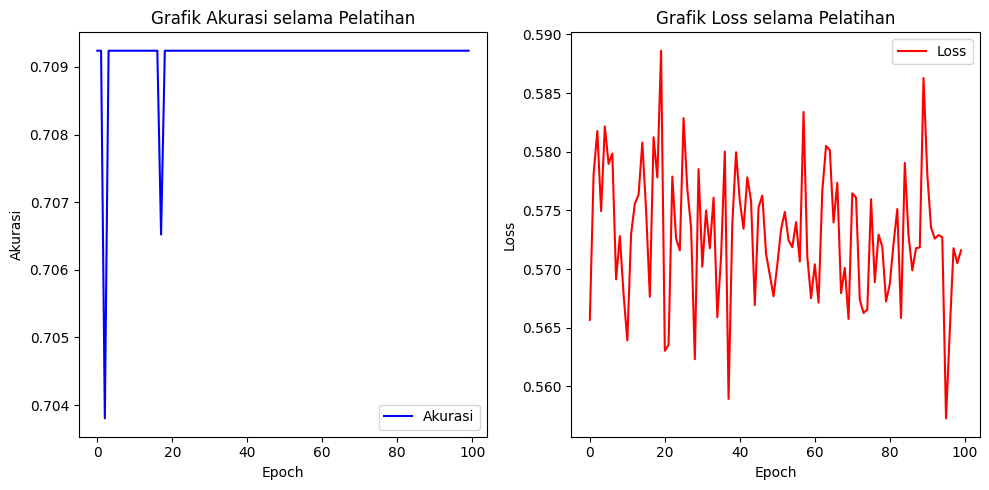

Build LSTM RNN model with test size  0.2
Epoch 1/100
11/11 [==============================] - 9s 10ms/step - loss: 0.6844 - accuracy: 0.6453
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 0.6539 - accuracy: 0.7125
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6210 - accuracy: 0.7125
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6034 - accuracy: 0.7125
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 0.5861 - accuracy: 0.7125
Epoch 6/100
11/11 [==============================] - 0s 15ms/step - loss: 0.5856 - accuracy: 0.7125
Epoch 7/100
11/11 [==============================] - 0s 14ms/step - loss: 0.5829 - accuracy: 0.7125
Epoch 8/100
11/11 [==============================] - 0s 16ms/step - loss: 0.5861 - accuracy: 0.7125
Epoch 9/100
11/11 [==============================] - 0s 15ms/step - loss: 0.5768 - accuracy: 0.7125
Epoch 10/100
11/11 [==============================] - 0s 13

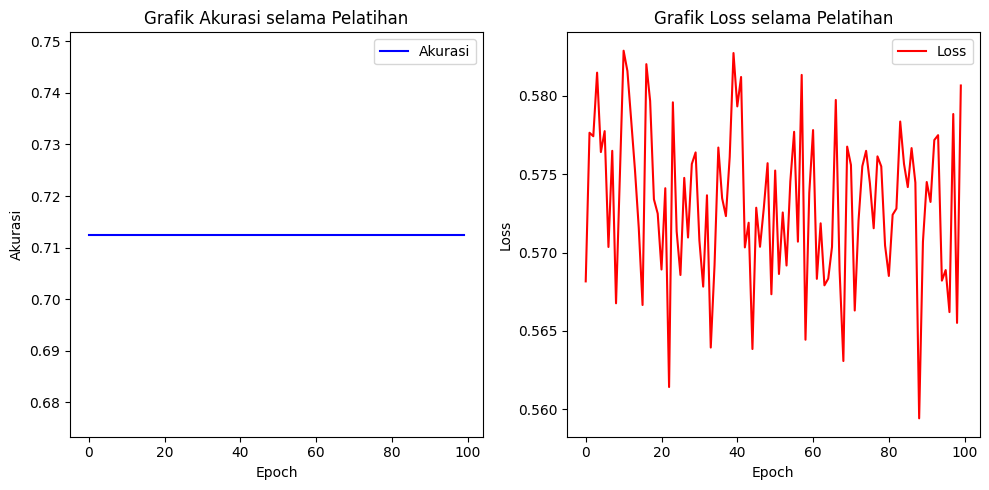

Build LSTM RNN model with test size  0.3
Epoch 1/100
9/9 [==============================] - 9s 11ms/step - loss: 0.6861 - accuracy: 0.6154
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 0.6607 - accuracy: 0.7063
Epoch 3/100
9/9 [==============================] - 0s 15ms/step - loss: 0.6375 - accuracy: 0.7063
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6203 - accuracy: 0.7063
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5936 - accuracy: 0.7063
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.5976 - accuracy: 0.7063
Epoch 7/100
9/9 [==============================] - 0s 13ms/step - loss: 0.5896 - accuracy: 0.7063
Epoch 8/100
9/9 [==============================] - 0s 12ms/step - loss: 0.5916 - accuracy: 0.7063
Epoch 9/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5798 - accuracy: 0.7063
Epoch 10/100
9/9 [==============================] - 0s 12ms/step - loss: 0.58

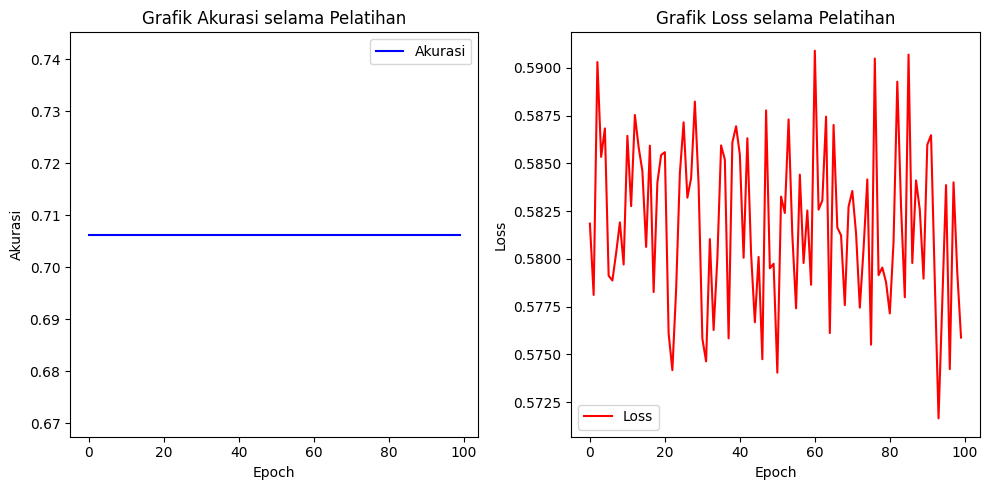

Build LSTM RNN model with test size  0.4
Epoch 1/100
8/8 [==============================] - 11s 12ms/step - loss: 0.6729 - accuracy: 0.6980
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6497 - accuracy: 0.6980
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6299 - accuracy: 0.6980
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6141 - accuracy: 0.6980
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6079 - accuracy: 0.6980
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5989 - accuracy: 0.6980
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6030 - accuracy: 0.6980
Epoch 8/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6017 - accuracy: 0.6980
Epoch 9/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5978 - accuracy: 0.6980
Epoch 10/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5

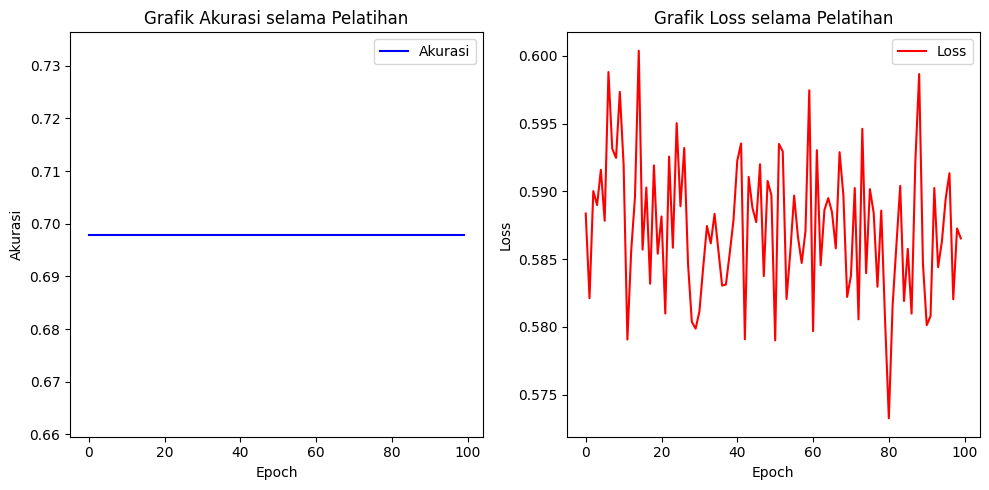

Build LSTM RNN model with test size  0.5
Epoch 1/100
7/7 [==============================] - 9s 12ms/step - loss: 0.6872 - accuracy: 0.6324
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6685 - accuracy: 0.7108
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6484 - accuracy: 0.7108
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6318 - accuracy: 0.7108
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6139 - accuracy: 0.7108
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.5974 - accuracy: 0.7108
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.5959 - accuracy: 0.7108
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5873 - accuracy: 0.7108
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 0.5870 - accuracy: 0.7108
Epoch 10/100
7/7 [==============================] - 0s 12ms/step - loss: 0.58

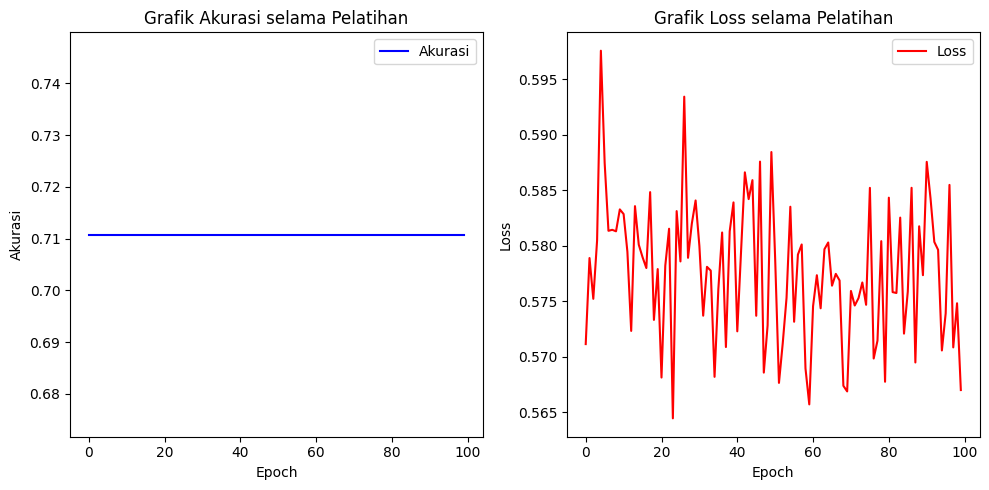

In [37]:
test_size = [0.1, 0.2, 0.3, 0.4, 0.5]

hasilMAE = []
hasilMSE = []
hasilRMSE = []
hasilAkurasi = []

all_accuracies = []
all_losses = []

accuracies = []
losses = []

for i in test_size:

    # accuracies = []
    # losses = []
    x_train, x_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=i, random_state=42)

    # Mengubah bentuk data menjadi 3 dimensi untuk RNN-LSTM (jumlah sampel, panjang setiap sampel, jumlah fitur)
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

    print('Build LSTM RNN model with test size ', i)
    model = Sequential()
    model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape = (1, 8)))
    model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=32, epochs=100)
    history = model.fit(x_train, y_train, batch_size=32, epochs=100)

    # Simpan metrik akurasi dan loss pada setiap epoch
    accuracies.append(history.history['accuracy'])
    losses.append(history.history['loss'])


    model.summary()

    # Melakukan prediksi pada data uji
    predictions = model.predict(x_test)


    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    y_pred = np.argmax(predictions, axis=1)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print("Akurasi:", accuracy)
    print("RMSE : ", rmse)
    print("MSE : ", mse)
    print("MAE : ", mae)

    hasilMAE.append(mae)
    hasilMSE.append(mse)
    hasilRMSE.append(rmse)
    hasilAkurasi.append(accuracy)

    # Plot metrik akurasi dan loss dalam satu grafik
    plt.figure(figsize=(10, 5))  # Mengatur ukuran grafik
    plt.subplot(1, 2, 1)  # Menampilkan dua grafik sejajar, yang pertama
    plt.plot(history.history['accuracy'], label='Akurasi', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.title('Grafik Akurasi selama Pelatihan')

    plt.subplot(1, 2, 2)  # Grafik kedua
    plt.plot(history.history['loss'], label='Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Grafik Loss selama Pelatihan')

    plt.tight_layout()  # Untuk menghindari tumpang tindih antara grafik
    plt.show()



In [39]:
history.history['loss']

[0.5711466670036316,
 0.5788946151733398,
 0.5752227306365967,
 0.5804827809333801,
 0.5975610613822937,
 0.5874504446983337,
 0.5813471674919128,
 0.5814352631568909,
 0.5813014507293701,
 0.5832743644714355,
 0.5828553438186646,
 0.5794579386711121,
 0.5723333954811096,
 0.5835674405097961,
 0.5800966024398804,
 0.5789719223976135,
 0.5779953598976135,
 0.584829568862915,
 0.5733259320259094,
 0.5779011845588684,
 0.5681352615356445,
 0.5782105326652527,
 0.5815329551696777,
 0.5644621253013611,
 0.5831203460693359,
 0.5785883665084839,
 0.59342360496521,
 0.5789157152175903,
 0.5819870829582214,
 0.5840789675712585,
 0.5799756050109863,
 0.5737048387527466,
 0.5781037211418152,
 0.5777618288993835,
 0.5681986808776855,
 0.5760917067527771,
 0.581195056438446,
 0.570881724357605,
 0.5813060998916626,
 0.5839039087295532,
 0.5722958445549011,
 0.5795237421989441,
 0.5866106152534485,
 0.5842030644416809,
 0.5859061479568481,
 0.5736972093582153,
 0.5875768661499023,
 0.568580150604248

# VALIDATION

In [40]:
from sklearn.model_selection import KFold

# Definisikan jumlah lipatan (fold)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

test_size = [0.1, 0.2, 0.3, 0.4, 0.5]

hasilMAEKFOLD = []
hasilMSEKFOLD = []
hasilRMSEKFOLD = []
hasilAkurasiKFOLD = []
hasilKFOLD = []

# Menyimpan akurasi dan loss dari setiap iterasi lipatan
akurasi_per_fold = []
loss_per_fold = []

# Inisialisasi list untuk menyimpan semua metrik
all_accuracies = []
all_losses = []

for i in test_size:
    
    # Inisialisasi list untuk menyimpan metrik pada iterasi K-Fold ini
    accuracies = []
    losses = []

    for train_index, test_index in kf.split(features):
        x_train, x_test = features[train_index], features[test_index]
        y_train, y_test = labels_encoded[train_index], labels_encoded[test_index]

        x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
        x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

        print('Build LSTM RNN model with test size ', i)
        model = Sequential()
        model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=(1, 8)))
        model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(x_train, y_train, batch_size=32, epochs=100)

        # Simpan riwayat pelatihan model
        history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=0)
        # Simpan metrik akurasi dan loss pada setiap epoch

        accuracies.append(history.history['accuracy'])
        losses.append(history.history['loss'])

        model.summary()

        predictions = model.predict(x_test)

         # Simpan akurasi dan loss dari setiap iterasi
        akurasi_per_fold.append(accuracy)
        loss_per_fold.append(mse)

        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)

        y_pred = np.argmax(predictions, axis=1)

        accuracy = accuracy_score(y_test, y_pred)
        print("Akurasi:", accuracy)
        print("RMSE : ", rmse)
        print("MSE : ", mse)
        print("MAE : ", mae)

        hasilMAEKFOLD.append(mae)
        hasilMSEKFOLD.append(mse)
        hasilRMSEKFOLD.append(rmse)
        hasilAkurasiKFOLD.append(accuracy)

        dataSave = {
            'test size': i,
            'History Akurasi': history.history['accuracy'],
            'History Loss': history.history['loss'],
            'Akurasi': accuracy,
            'RMSE' : hasilMSEKFOLD,
            'MSE' : hasilMSEKFOLD,
            'MAE' : hasilMAEKFOLD,
        }
        
        hasilKFOLD.append(dataSave)

        print(hasilKFOLD)
    
    # Tambahkan metrik akurasi dan loss untuk ukuran pengujian ini ke list yang lebih besar
    all_accuracies.append(accuracies)
    all_losses.append(losses)


# Setelah iterasi K-Fold selesai, Anda dapat menghitung rata-rata hasil dari semua lipatan.
rata_rata_mae = np.mean(hasilMAEKFOLD)
rata_rata_mse = np.mean(hasilMSEKFOLD)
rata_rata_rmse = np.mean(hasilRMSEKFOLD)
rata_rata_akurasi = np.mean(hasilAkurasiKFOLD)

print("Rata-rata MAE:", rata_rata_mae)
print("Rata-rata MSE:", rata_rata_mse)
print("Rata-rata RMSE:", rata_rata_rmse)
print("Rata-rata Akurasi:", rata_rata_akurasi)


Build LSTM RNN model with test size  0.1
Epoch 1/100
11/11 [==============================] - 7s 10ms/step - loss: 0.6842 - accuracy: 0.6116
Epoch 2/100
11/11 [==============================] - 0s 13ms/step - loss: 0.6525 - accuracy: 0.7125
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 0.6190 - accuracy: 0.7125
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5986 - accuracy: 0.7125
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5898 - accuracy: 0.7125
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5838 - accuracy: 0.7125
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5904 - accuracy: 0.7125
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5766 - accuracy: 0.7125
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5890 - accuracy: 0.7125
Epoch 10/100
11/11 [==============================] - 0s 9m

In [49]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(hasilKFOLD)

# Nama file CSV yang akan Anda buat
file_name = "data hasil run 10-9-2023.csv"

# Menyimpan DataFrame ke dalam file CSV
df.to_csv(file_name, index=False)

print(f"Data telah ditulis ke {file_name}")

Data telah ditulis ke data hasil run 10-9-2023.csv


In [47]:
import csv
# Nama file CSV yang akan Anda buat
file_name = "data hasil 10 sept.csv"

# Menulis data ke dalam file CSV
with open(file_name, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(hasilKFOLD)


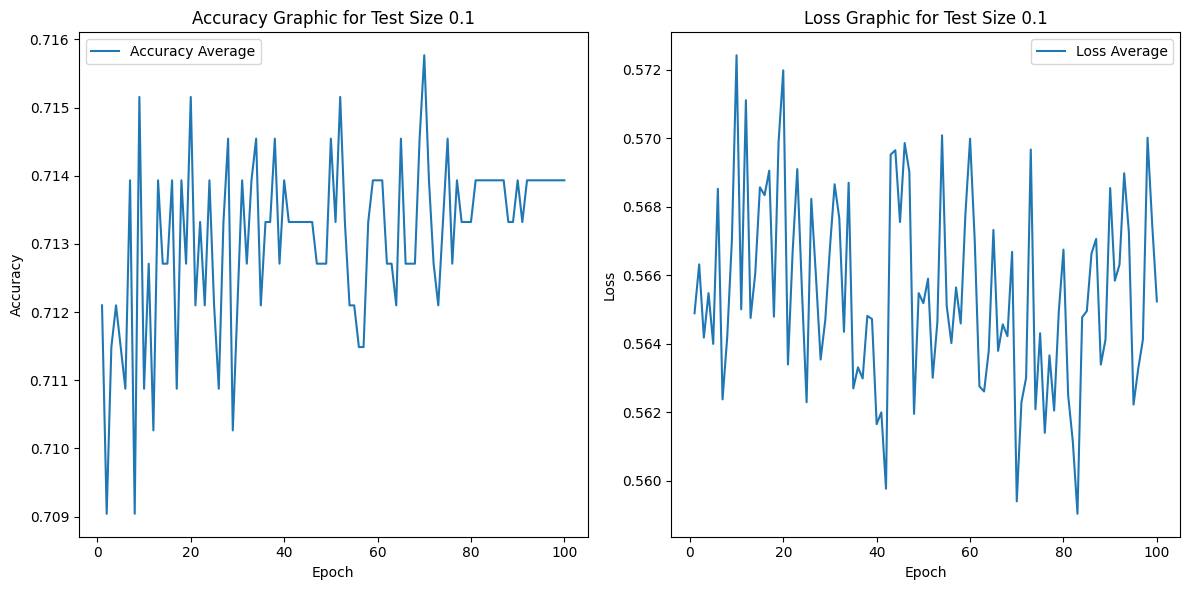

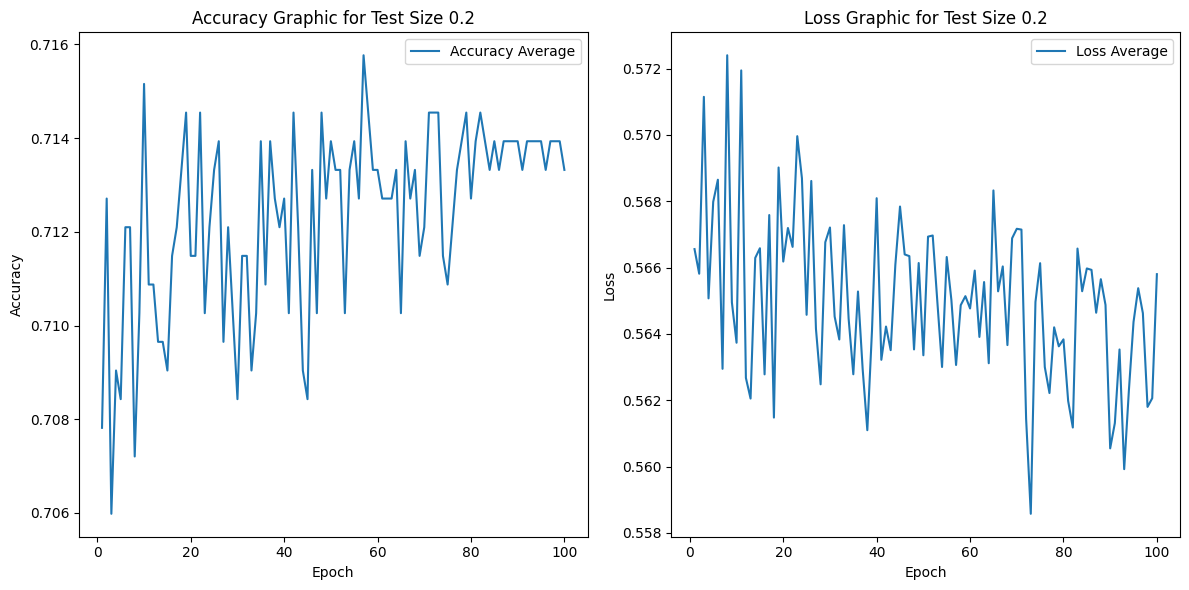

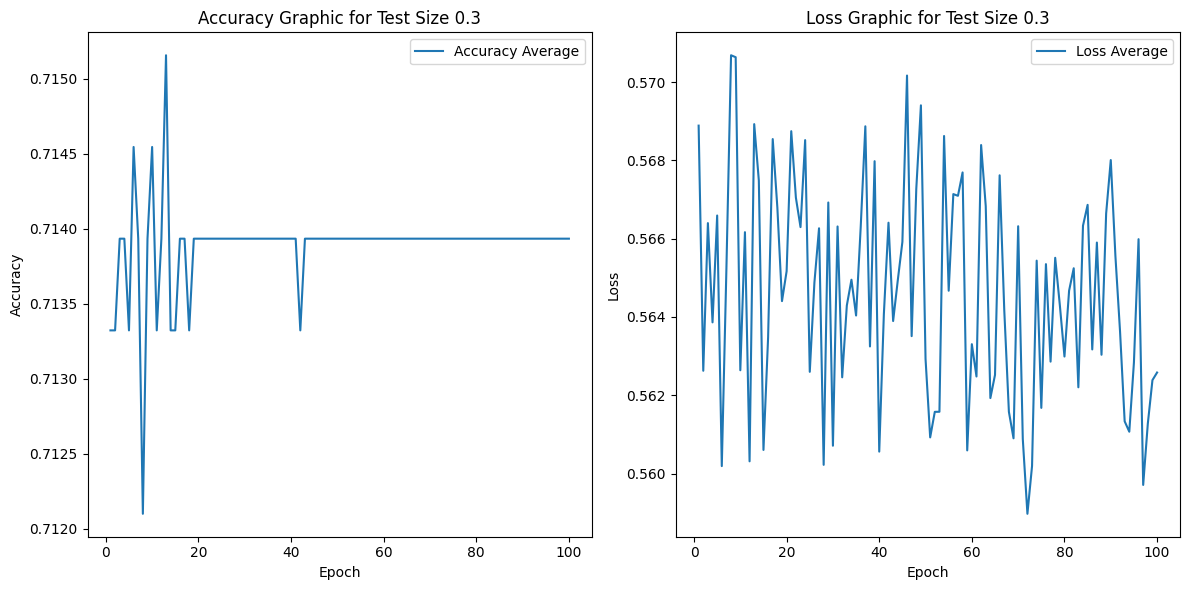

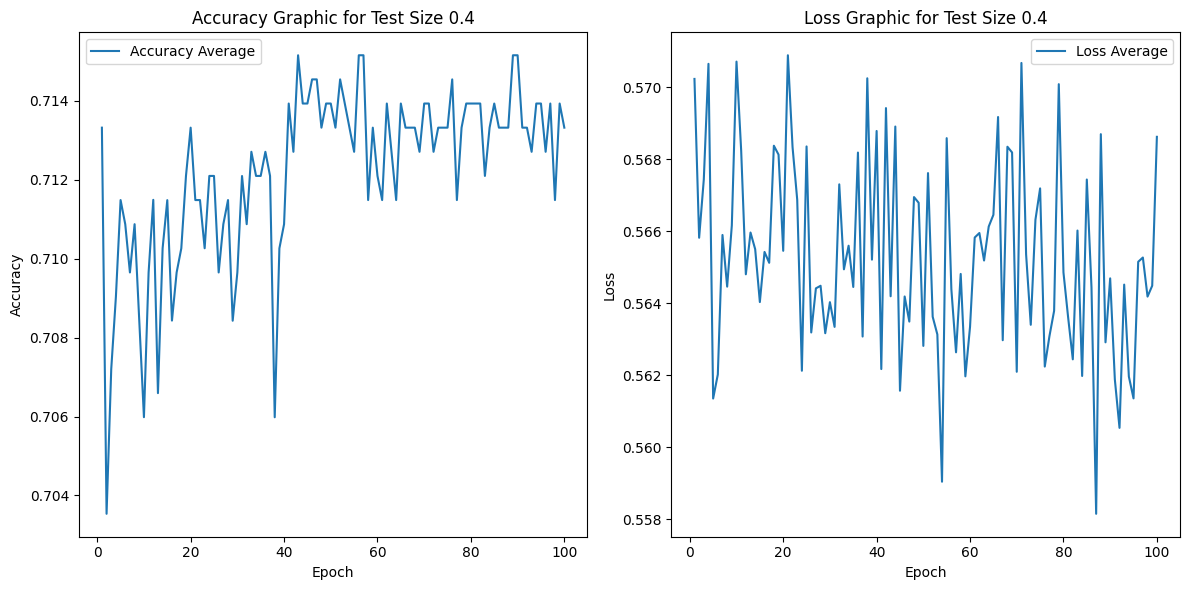

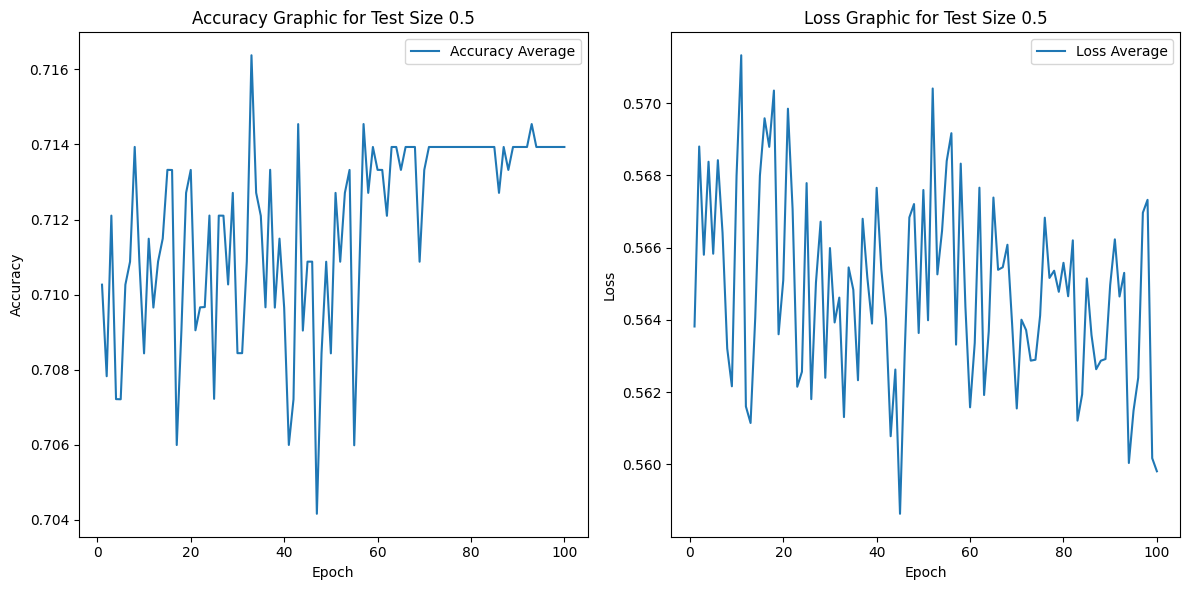

In [45]:
# Setelah loop K-Fold selesai, gambar grafik untuk setiap ukuran pengujian
for i in range(len(test_size)):
    num_epochs = len(all_accuracies[i][0])  # Ambil jumlah epoch dari salah satu fold
    avg_accuracies = np.mean(np.array(all_accuracies[i]), axis=0)
    avg_losses = np.mean(np.array(all_losses[i]), axis=0)

    plt.figure(figsize=(12, 6))  # Mengatur ukuran grafik
    plt.subplot(1, 2, 1)  # Menampilkan dua grafik sejajar, yang pertama
    plt.plot(range(1, num_epochs + 1), avg_accuracies, label='Accuracy Average')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Graphic for Test Size {test_size[i]}')
    plt.legend()

    plt.subplot(1, 2, 2)  # Grafik kedua
    plt.plot(range(1, num_epochs + 1), avg_losses, label='Loss Average')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Graphic for Test Size {test_size[i]}')
    plt.legend()

    plt.tight_layout()  # Untuk menghindari tumpang tindih antara grafik
    plt.show()

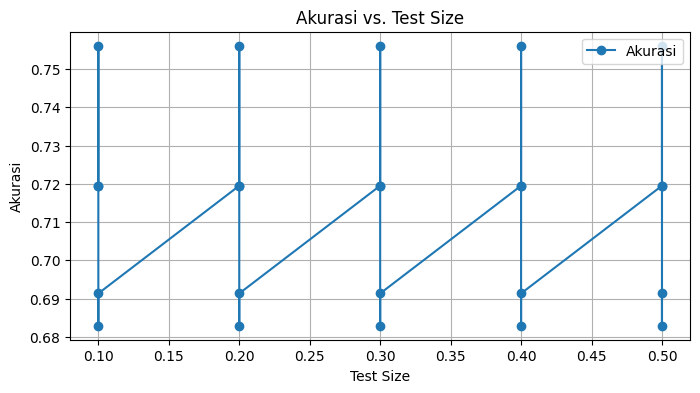

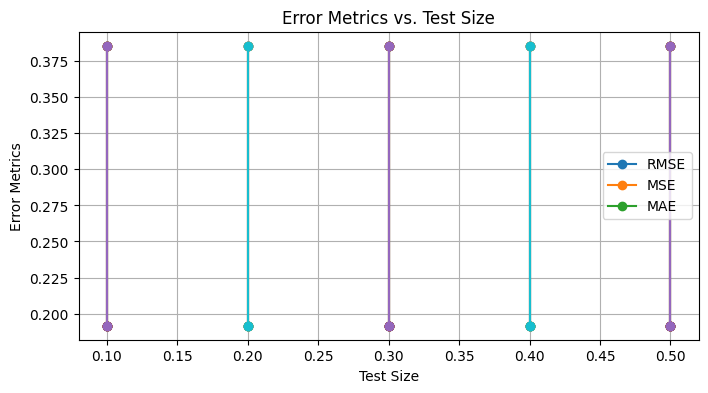

In [19]:


dataTemp = hasilKFOLD

# Membuat plot untuk Akurasi
test_sizes = [item['test size'] for item in dataTemp]
accuracies = [item['Akurasi'] for item in dataTemp]

plt.figure(figsize=(8, 4))
plt.plot(test_sizes, accuracies, marker='o', label='Akurasi')
plt.xlabel('Test Size')
plt.ylabel('Akurasi')
plt.title('Akurasi vs. Test Size')
plt.legend()
plt.grid(True)
plt.show()

# Membuat plot untuk RMSE, MSE, dan MAE
plt.figure(figsize=(8, 4))
for item in dataTemp:
    test_size = item['test size']
    rmse = sum(item['RMSE']) / len(item['RMSE'])  # Mengambil rata-rata RMSE
    mse = sum(item['MSE']) / len(item['MSE'])    # Mengambil rata-rata MSE
    mae = sum(item['MAE']) / len(item['MAE'])    # Mengambil rata-rata MAE

    plt.plot([test_size, test_size, test_size], [rmse, mse, mae], marker='o', label=f'Test Size {test_size}')

plt.xlabel('Test Size')
plt.ylabel('Error Metrics')
plt.title('Error Metrics vs. Test Size')
plt.legend(['RMSE', 'MSE', 'MAE'])
plt.grid(True)
plt.show()


[0.1] :  [0.7195121951219512, 0.7560975609756098, 0.7195121951219512, 0.6829268292682927, 0.691358024691358]
[0.1, 0.4] :  [0.7195121951219512, 0.7560975609756098, 0.7195121951219512, 0.6829268292682927, 0.691358024691358]
[0.1, 0.4, 0.3] :  [0.7195121951219512, 0.7560975609756098, 0.7195121951219512, 0.6829268292682927, 0.691358024691358]
[0.1, 0.4, 0.3, 0.2] :  [0.7195121951219512, 0.7560975609756098, 0.7195121951219512, 0.6829268292682927, 0.691358024691358]
[0.1, 0.4, 0.3, 0.2, 0.5] :  [0.7195121951219512, 0.7560975609756098, 0.7195121951219512, 0.6829268292682927, 0.691358024691358]


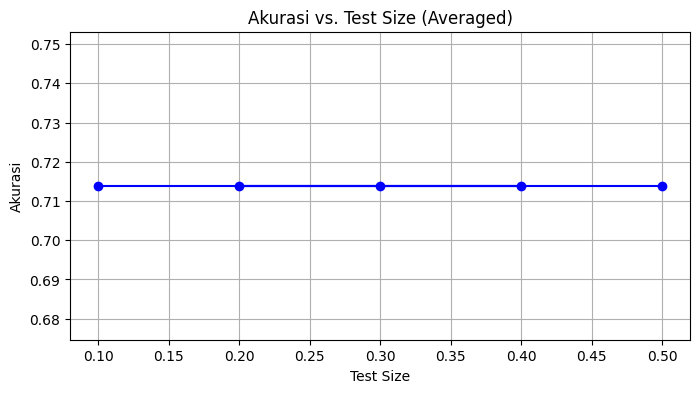

In [27]:

# Menghitung rata-rata Akurasi untuk setiap nilai Test Size
test_sizes = []
averaged_accuracies = []

for test_size in set(item['test size'] for item in dataTemp):
    accuracies = [item['Akurasi'] for item in dataTemp if item['test size'] == test_size]
    test_sizes.append(test_size)
    averaged_accuracies.append(np.mean(accuracies))
    print(test_sizes, ": ", averaged_accuracies)

# Membuat plot Akurasi vs. Test Size
plt.figure(figsize=(8, 4))
plt.plot(test_sizes, averaged_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Test Size')
plt.ylabel('Akurasi')
plt.title('Akurasi vs. Test Size (Averaged)')
plt.grid(True)
plt.show()

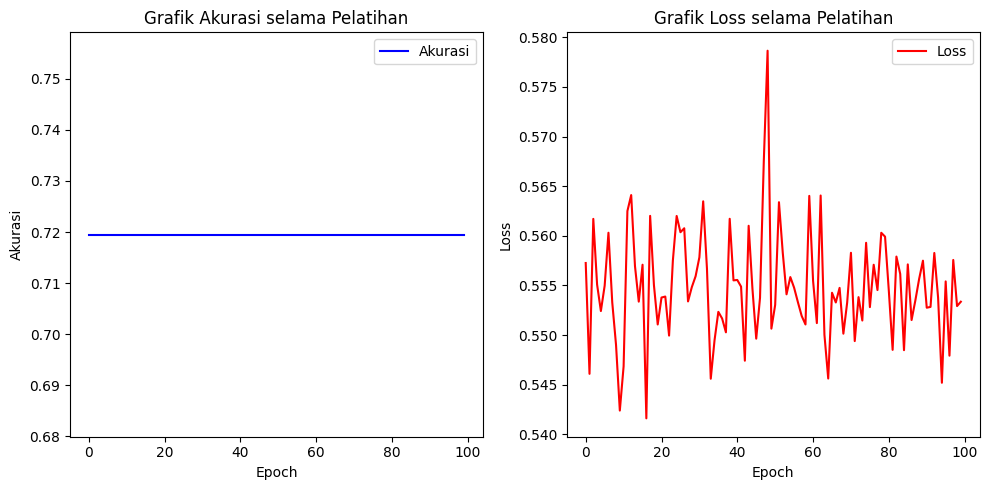

In [36]:
# Plot metrik akurasi dan loss dalam satu grafik
plt.figure(figsize=(10, 5))  # Mengatur ukuran grafik
plt.subplot(1, 2, 1)  # Menampilkan dua grafik sejajar, yang pertama
plt.plot(history.history['accuracy'], label='Akurasi', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.title('Grafik Akurasi selama Pelatihan')

plt.subplot(1, 2, 2)  # Grafik kedua
plt.plot(history.history['loss'], label='Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Grafik Loss selama Pelatihan')

plt.tight_layout()  # Untuk menghindari tumpang tindih antara grafik
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Membuat grafik MAE
plt.plot(test_size, hasilMAEKFOLD, marker='o', label='MAE')
plt.xlabel('Test Size')
plt.ylabel('MAE')
plt.title('MAE by Test Size')
plt.legend()
plt.grid(True)
plt.show()



In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score 
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import KFold


In [9]:
# CONFUSION MATRIX

# Memprediksi label pada data uji
Y_pred_prob = model.predict(x_test)
Y_pred = np.argmax(Y_pred_prob, axis=1)


y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Menghitung confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

3/3 [==============================] - 0s 3ms/step
Confusion Matrix:
[[59  0]
 [23  0]]


In [10]:
# Menginisialisasi confusion matrix
cm_total = np.zeros((len(label_encoder.classes_), len(label_encoder.classes_)))

# Mengonversi label menjadi tipe numerik
y_encoded = label_encoder.fit_transform(labels_encoded)

# Melakukan K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1


for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    Y_trains, Y_tests = y_encoded[train_index], y_encoded[test_index]

    x_train_reshaped = np.expand_dims(X_train,axis=1)
    x_test_reshaped = np.expand_dims(X_test, axis=1)

    # Membangun dan melatih model di setiap fold
    model = Sequential()
    model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape = (1, 8)))
    model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train_reshaped, Y_trains, batch_size=32, epochs=100)

    # Memprediksi label pada data uji
    Y_pred = model.predict(x_test_reshaped)
    Y_pred_classes = np.argmax(Y_pred, axis=1)

    # Menghitung dan menampilkan confusion matrix pada setiap fold
    rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
    mse = mean_squared_error(y_test, Y_pred)
    mae = mean_absolute_error(y_test, Y_pred)


    print("RMSE : ", rmse)
    print("MSE : ", mse)
    print("MAE : ", mae)



Epoch 1/100
11/11 [==============================] - 7s 7ms/step - loss: 0.6835 - accuracy: 0.6361
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.7125
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6234 - accuracy: 0.7125
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5930 - accuracy: 0.7125
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5888 - accuracy: 0.7125
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5793 - accuracy: 0.7125
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5824 - accuracy: 0.7125
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5809 - accuracy: 0.7125
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5798 - accuracy: 0.7125
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5788 - accuracy: 0.7125
Epoch 11/

ValueError: Found input variables with inconsistent numbers of samples: [82, 81]

Confusion Matrix - Total:
[[292.   0.]
 [117.   0.]]


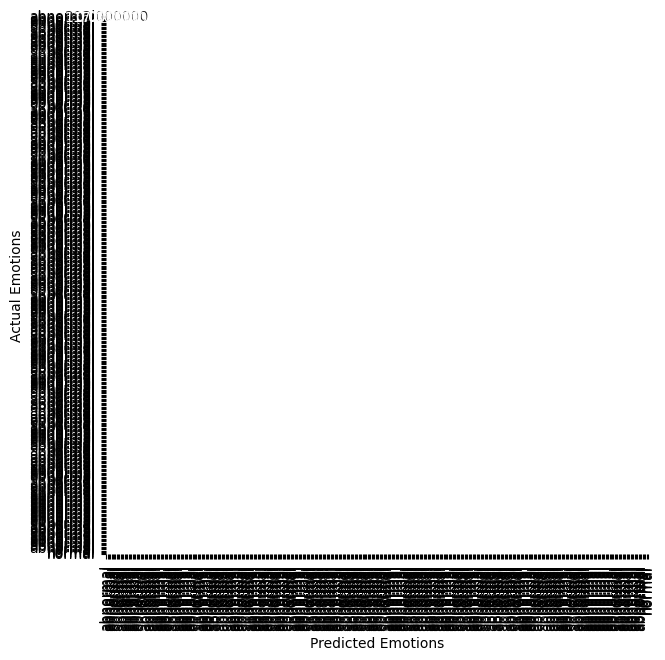

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Menampilkan confusion matrix total
print("Confusion Matrix - Total:")
print(cm_total)
